Importing the required libraries and modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,AveragePooling2D
import matplotlib.pyplot as plt
import cv2

Now we load our dataset

We are using the MNIST dataset, which contains images of handwritten images of size (28,28,1)

In [2]:
dataset = keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


Checking the dimensions

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


One-hot encoding

Converting the label values into 0 or 1

In [4]:
y_train = np_utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test = np_utils.to_categorical(y_test,num_classes=10,dtype='float32')

Reshaping the train and test sets to a 4 dimensional array

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Building our LeNet

LeNet-5 is a ConvNet structure which was proposed by Yann LeCun in 1989

Link of the research paper: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

Below is the architecture of the same

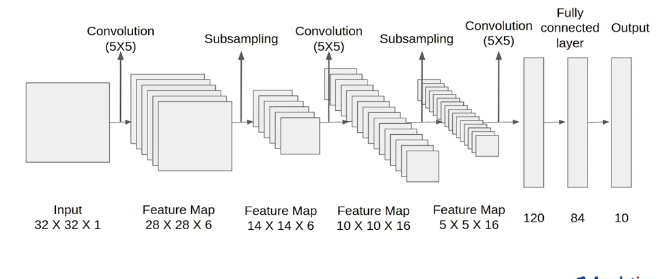

In [7]:
model = tf.keras.models.Sequential()
#Feature Maps are filters
model.add(Conv2D(filters=6,input_shape=(28,28,1),kernel_size=(5,5),strides=(1,1),padding='same'))
model.add(Activation('tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),padding='valid'))
model.add(Activation('tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=120,kernel_size=(5,5),strides=(1,1),padding='valid'))
model.add(Activation('tanh'))
model.add(Flatten())
model.add(Dense(units=84))
model.add(Activation('tanh'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 120)        

We are using the categorial-crossentropy loss function

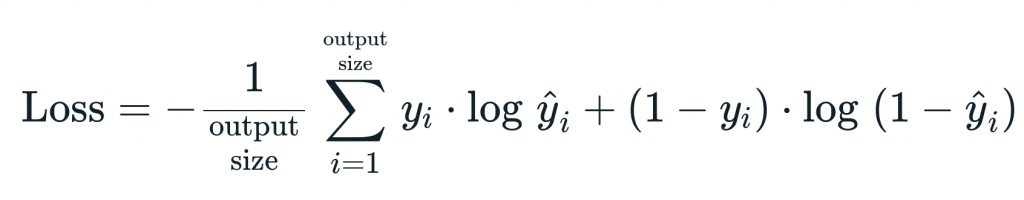

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(x=x_train,y=y_train,epochs=15,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/15
469/469 [==============================] - 33s 8ms/step - loss: 0.3250 - accuracy: 0.9050 - val_loss: 0.1522 - val_accuracy: 0.9546
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1185 - accuracy: 0.9644 - val_loss: 0.0888 - val_accuracy: 0.9710
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0620 - val_accuracy: 0.9802
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0527 - val_accuracy: 0.9826
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0517 - val_accuracy: 0.9828
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0351 - accuracy: 0.9897 - val_loss: 0.0429 - val_accuracy: 0.9869
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0522 - accuracy: 0.9858


[0.05219421535730362, 0.98580002784729]

Building our AlexNet

Alexnet is a well-known neural network architecture, which was designed by Alex Krizhevsky

Link of the research paper: https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

Below is the architecture of the same

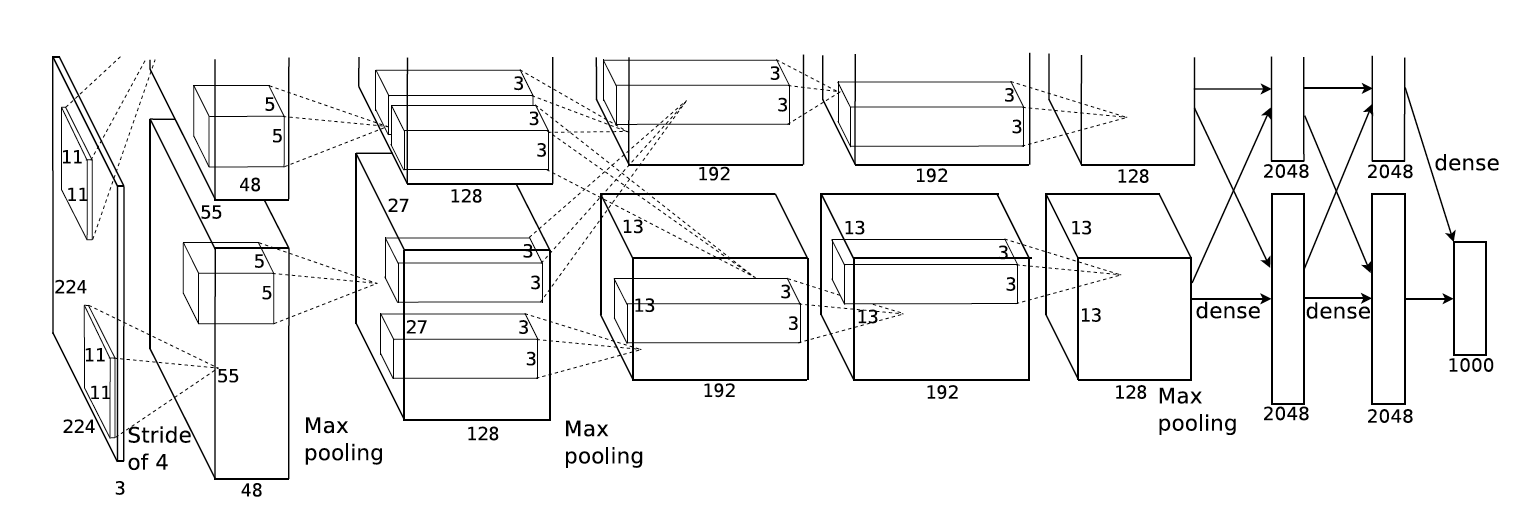

In [6]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(4096, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1000))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 5, 96)          11712     
_________________________________________________________________
activation (Activation)      (None, 5, 5, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 2, 96)          384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 256)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 256)         0

In [11]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
469/469 [==============================] - 6s 8ms/step - loss: 0.3320 - accuracy: 0.9058 - val_loss: 0.1647 - val_accuracy: 0.9507
Epoch 2/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1195 - accuracy: 0.9640 - val_loss: 0.0954 - val_accuracy: 0.9716
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0770 - accuracy: 0.9768 - val_loss: 0.0694 - val_accuracy: 0.9779
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0610 - val_accuracy: 0.9815
Epoch 5/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0524 - val_accuracy: 0.9843
Epoch 6/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0483 - val_accuracy: 0.9832
Epoch 7/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9863


[0.06002938747406006, 0.986299991607666]